## Упражнение 1

Прочитайте как датафрейм файл `task1_salary.xls`, названия месяцев должны быть именами рядов, выведите на экран. Определите полную зарплату, сложив базовую и бонусную часть, за каждый месяц и за весь год.

In [11]:
import pandas as pd
df = pd.read_excel('task1_salary.xls', index_col=[0])
df

,Base,Bonus
Month,,
January,38400,18442
February,45600,16485
March,52800,17117
April,50400,27468
May,45600,26107
June,50400,2054
July,50400,16414
August,55200,1794
September,52800,25200


In [10]:
import pandas as pd
df = pd.read_excel('task1_salary.xls', index_col=[0])

#месяц
sum_m = df.sum(axis=1)
print(sum_m)

#год
sum_y = df['Base'].sum() + df['Bonus'].sum()
print('\n', 'полная зарплата за весь год =', sum_y)

Month
January      56842
February     62085
March        69917
April        77868
May          71707
June         52454
July         66814
August       56994
September    78000
October      73905
November     82423
December     80890
dtype: int64

 полная зарплата за весь год = 829899


## Упражнение 2

Откройте файл `task2_column_names.ods`, постройте графики для каждой из колонок от B до U в качестве ординаты с колонкой A  в качестве абсциссы. Сохраните датафрейм как Excel-файл (формат выберите в зависимости от версии MS Office, которая у вас установлена, если MS Office нет, сохраните как xlsx), причём переименуйте колонки, чтобы их имена были более понятны непосвящённому читателю: A означает контрольный образец, S - тестируемый образец, число - во сколько раз образец разбавлен, плюс или минус - наличие или отсутствие модулятора.

датафрейм сохранена как Excel-файл


<AxesSubplot:xlabel='t'>

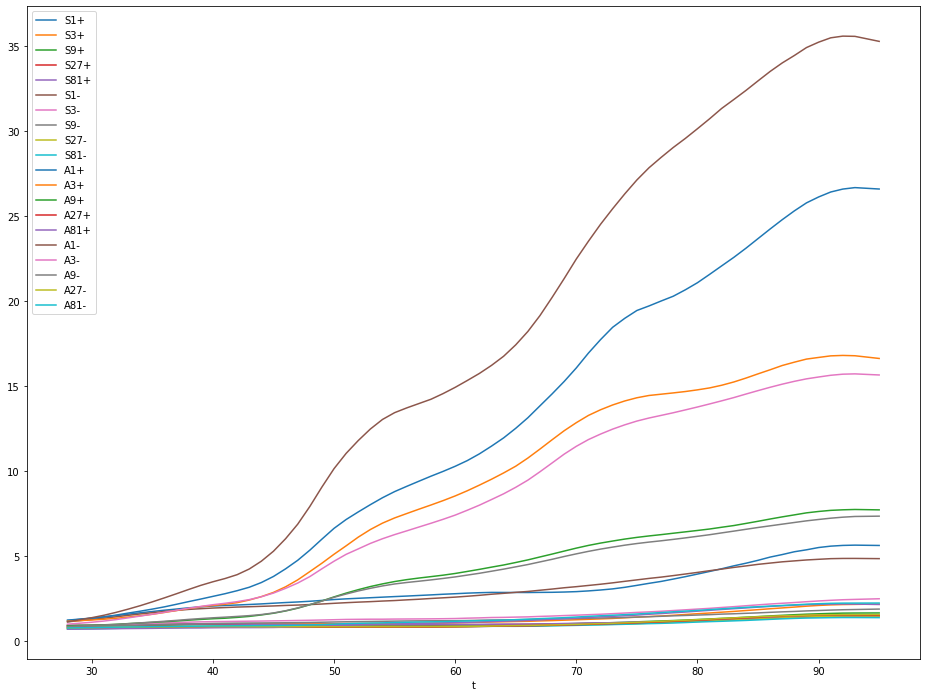

In [12]:
import pandas as pd

df = pd.read_excel('task2_column_names.ods')

#переименование столбцов
exel_renamed = df.rename(
    columns={
        df.columns[1] : "тестовый образец, модулятор есть, разбавлен в 1 раз",
        df.columns[2] : "тестовый образец, модулятор есть, разбавлен в 3 раза",
        df.columns[3] : "тестовый образец, модулятор есть, разбавлен в 9 раз",
        df.columns[4] : "тестовый образец, модулятор есть, разбавлен в 27 раз",
        df.columns[5] : "тестовый образец, модулятор есть, разбавлен в 81 раз",
        df.columns[6] : "тестовый образец, модулятора нет, разбавлен в 1 раз",
        df.columns[7] : "тестовый образец, модулятора нет, разбавлен в 3 раза",
        df.columns[8] : "тестовый образец, модулятора нет, разбавлен в 9 раз",
        df.columns[9] : "тестовый образец, модулятора нет, разбавлен в 27 раз",
        df.columns[10] : "тестовый образец, модулятора нет, разбавлен в 81 раз",
        df.columns[11] : "контрольный образец, модулятор есть, разбавлен в 1 раз",
        df.columns[12] : "контрольный образец, модулятор есть, разбавлен в 3 раза",
        df.columns[13] : "контрольный образец, модулятор есть, разбавлен в 9 раз",
        df.columns[14] : "контрольный образец, модулятор есть, разбавлен в 27 раз",
        df.columns[15] : "контрольный образец, модулятор есть, разбавлен в 81 раз",
        df.columns[16] : "контрольный образец, модулятора нет, разбавлен в 1 раз",
        df.columns[17] : "контрольный образец, модулятора нет, разбавлен в 3 раза",
        df.columns[18] : "контрольный образец, модулятора нет, разбавлен в 9 раз",
        df.columns[19] : "контрольный образец, модулятора нет, разбавлен в 27 раз",
        df.columns[20] : "контрольный образец, модулятора нет, разбавлен в 81 раз"
    }, inplace = True
)

#формирование excel таблицы
writer = pd.ExcelWriter('task2_column_names.xlsx', engine='xlsxwriter')

#конвертация датафрейм в XlsxWriter Excel
df.to_excel(writer, sheet_name = 'concentration_trials')

#-> xlsxwriter workbook & worksheet
workbook  = writer.book
worksheet = writer.sheets['concentration_trials']

#для переноса слов в заголовке 
header_format = workbook.add_format({
    'bold': True,          
    'text_wrap': True,      #перенос по словам
    'valign': 'top',        #вертикальное выравнивание
    'border': 1})           #толщина ячейки

#заголовки
for col_num, value in enumerate(df.columns.values):
    worksheet.write(0, col_num + 1, value, header_format)
    
writer.save() #сохранение excel файла 
print('датафрейм сохранена как Excel-файл')

#график
df = pd.read_excel('task2_column_names.ods')
x, *y = df.columns
df.plot(x, y, figsize=(16,12))

## Упражнение 3

Откройте файл `task1_salary.xls` как датафрейм, добавьте в него колонку `Total` с суммой бонуса и базы за каждый месяц. Сохраните как xlsx.

In [13]:
import pandas as pd
df = pd.read_excel('task1_salary.xls', index_col=[0])

df['Total'] = df.sum(axis=1)

excel = pd.ExcelWriter('task1_salary.xlsx')
df.to_excel(excel)
excel.save() 
print('датафрейм сохранена как Excel-файл')

датафрейм сохранена как Excel-файл
